In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


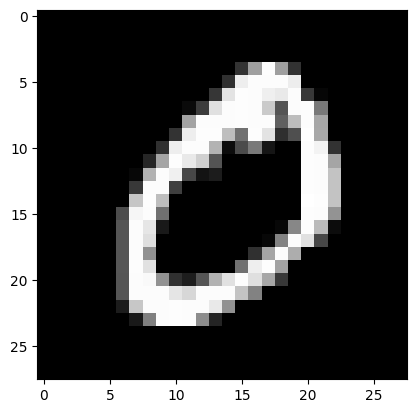

In [4]:
import matplotlib.pyplot as plt

image = x_train[1]
plt.imshow(image, cmap='gray')

In [5]:
y_train[1]

0

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_valid.shape

(10000, 28, 28)

In [8]:
x_train.dtype

dtype('uint8')

In [9]:
x_train.min()

0

In [10]:
x_train.max()

255

In [11]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [12]:
x_valid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_train = x_train.astype("float32") / 255.0
x_valid = x_valid.astype("float32") / 255.0

In [15]:
x_train.dtype

dtype('float32')

In [16]:
x_train.min()

0.0

In [17]:
x_train.max()

1.0

In [18]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

num_categories = 10

y_train = to_categorical(y_train, num_classes=num_categories)
y_valid = to_categorical(y_valid, num_classes=num_categories)

In [19]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [21]:
from tensorflow.keras.layers import Dense

In [22]:
import tensorflow as tf

model.add(Dense(units=512, activation=tf.nn.relu, input_shape=(784,)))

In [23]:
model.add(Dense(units=256, activation=tf.nn.relu))

In [24]:
model.add(Dense(units=10, activation=tf.nn.softmax))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1885 - accuracy: 0.9432 - val_loss: 0.1046 - val_accuracy: 0.9696
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0839 - accuracy: 0.9753 - val_loss: 0.0807 - val_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0590 - accuracy: 0.9832 - val_loss: 0.0851 - val_accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0460 - accuracy: 0.9871 - val_loss: 0.0739 - val_accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.1028 - val_accuracy: 0.9779


In [32]:
from PIL import Image
import numpy as np
import cv2

# Load the image
image1 = cv2.imread("/content/OIP.jpeg")
image1= cv2.resize(image1, (28,28))
image1.shape
image1= image1/255

In [33]:
# image1= np.moveaxis(image1, 1, 0)
image1.shape

(28, 28, 3)

In [34]:
image1= image1[:,:,1]

In [35]:
image1.shape

(28, 28)

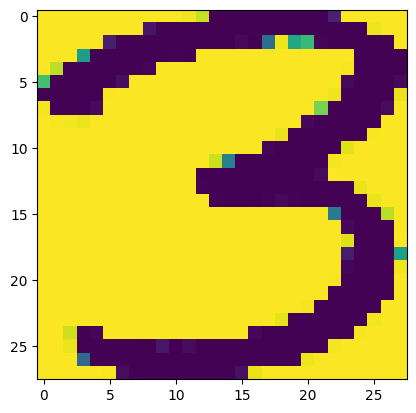

In [36]:
plt.imshow(image1)

In [37]:
image1=image1.reshape((784,))
image1.shape

(784,)

In [38]:
# Predict the class
prediction = model.predict(np.expand_dims(image1, 0))[0]

1/1 [==============================] - 0s 209ms/step


In [39]:
prediction

array([9.9998260e-01, 6.9816440e-12, 1.6418825e-08, 7.3076176e-09,
       9.0579752e-11, 6.0792200e-07, 1.6535478e-05, 4.6168519e-10,
       1.6811015e-07, 2.5155238e-08], dtype=float32)

In [40]:
# Get the predicted class index and probability
predicted_class_index = np.argmax(prediction)
predicted_probability = np.max(prediction)

# Print the results
print(f"Predicted class: {predicted_class_index}")
print(f"Probability: {predicted_probability}")

Predicted class: 0
Probability: 0.9999825954437256
